# Q1
## Strong Scaling Analysis
Plotting the speedup and the efficiency for strong scaling. 

$$
S(P) = \frac{T(1)}{T(P)} = P \\
E_P(P) = \frac{S(P)}{P} 
$$
### Loop Time Plots

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

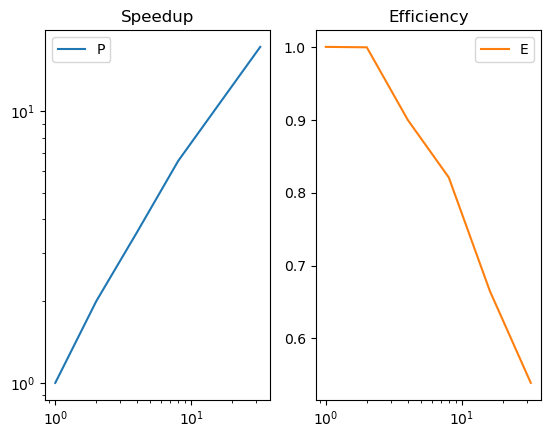

In [88]:
## Loop Time from {1 ... 32} 
proc = [1,2,4,8,16,32]   #processor array
P = [2270.33, 1135.84, 630.797, 345.721, 213.263, 131.6] #Speedup
E = P.copy() #Efficiency
buff = P.copy()

#Calculate our P and E (speedup)
for i in range(len(P)):
    P[i] = buff[0]/buff[i]
    E[i] = buff[0]/ (proc[i] * buff[i])

#Plot speedup
fig, axs = plt.subplots(1,2)
axs[0].loglog(proc,P, label="P")
axs[0].set_title("Speedup")
axs[0].legend()

#Plotting the efficiency
axs[1].semilogx(proc,E, "tab:orange", label="E")
axs[1].set_title("Efficiency")
axs[1].legend()

We can see that the behavior that is exhibited in this strong scaling demonstration is that the speedup has a power law relationship with the number of processors when plotted. This is on account of it being somewhat linear in the log-log plot. To further clarify, as the number of processors increases, the speedup does to --- eventually reaching some asymptotic limit.

The efficiency on the other hand seems to hold an exponential~ish relationship in linear axes. This is on account of the curve in the efficiency being rather linear in a x-axis semilog plot.

### Total Computational Time

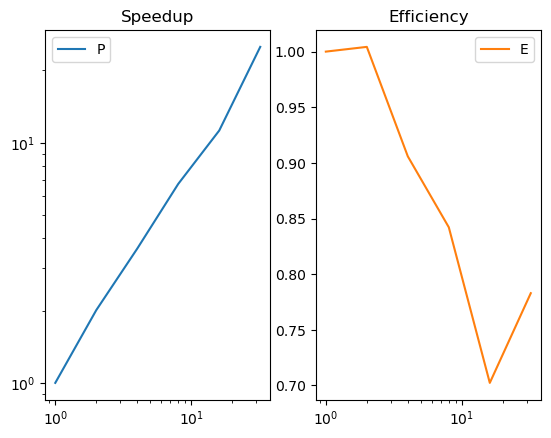

In [89]:
Pair = np.array([1888.6,941.836,523.96,282.646,169.44,75.7367])
Neigh = np.array([286.987,141.346,76.442,40.2717,24.1592,11.0981])
Comm = np.array([20.2384,15.7155,11.5397,8.787,7.58729,41.2589])

T_Comp = Pair + Neigh
P_Comp = np.copy(T_Comp)
E_Comp = np.copy(T_Comp)

#Calculate our P and E (speedup)
for i in range(len(P)):
    P_Comp[i] = T_Comp[0]/T_Comp[i]
    E_Comp[i] = T_Comp[0]/ (proc[i] * T_Comp[i])
    
#Plot speedup
fig, axs = plt.subplots(1,2)
axs[0].loglog(proc,P_Comp, label="P")
axs[0].set_title("Speedup")
axs[0].legend()

#Plotting the efficiency
axs[1].semilogx(proc,E_Comp, "tab:orange", label="E")
axs[1].set_title("Efficiency")
axs[1].legend()

When the same speedup and efficiency parameters are plotted against the total computational time, instead of the loop time, we see similar behavior. The speedup is once again linear in the loglog plot, implying a power relationship. The efficiency also holds similar properties in its x-axis semilog plot with one distinct difference. THe efficiency seems to improve when the jump from 16 to 32 processors is made.

### Communication Times

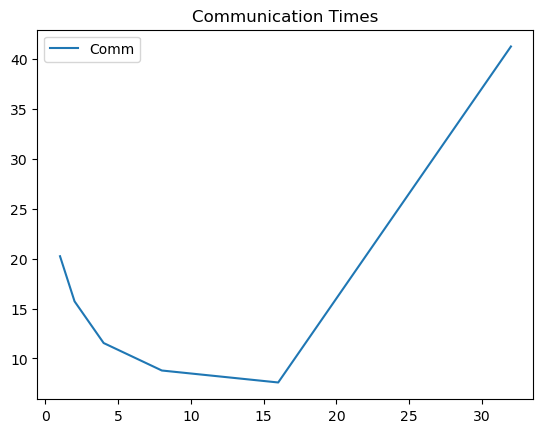

In [90]:
#Plot communication times
fig, axs = plt.subplots()
axs.plot(proc,Comm, label="Comm")
axs.set_title("Communication Times")
axs.legend()

Strangely enough, the processor communication times between one another are non-zero even when it only runs on a single processor. 

However, the communcation times seem to decrease until a certain point -- in this case, it would be 16 processors. From then on, the communication times achieve a linear relationship between the number of processors that are talking and the total communcation times.

## Weak Scaling Analysis
Plotting the sizeup and the efficiency for strong scaling. 

$$
S(N,P) = \frac{P T(N_0,1)}{T(PN_0,P)} \\ \\ 
E_w(N,P) = \frac{S(N,P)}{P}
$$

### Loop Time

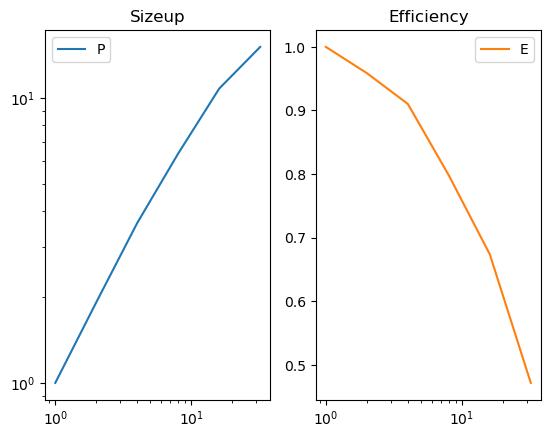

In [91]:
LoopW = np.array([271.691, 283.373, 298.455, 340.439, 403.14,  575.865])
PairW = np.array([226.113, 233.975, 246.32,  276.893, 318.74,  393.277])
NeighW = np.array([36.0117, 36.6798, 37.3836, 39.363,  45.0053, 56.4633])
CommW = np.array([2.21538, 4.25061, 5.74336, 9.9896,  15.1915, 106.914])

PW = np.zeros((LoopW.shape))
EW = np.zeros((LoopW.shape))

#Calculate the sizeup and the efficiency. 
for ii in range(len(LW)):
    PW[ii] = proc[ii] * LoopW[0] / LoopW[ii]
    EW[ii] = LoopW[0] / LoopW[ii]
    
#Plot the parallel efficiency using the loop time.
#Plot sizeup
fig, axs = plt.subplots(1,2)
axs[0].loglog(proc,PW, label="P")
axs[0].set_title("Sizeup")
axs[0].legend()

#Plotting the efficiency
axs[1].semilogx(proc,EW, "tab:orange", label="E")
axs[1].set_title("Efficiency")
axs[1].legend()

The efficiency of the weak scaling resembles the graph that was made for the strong scaling demonstration. As the numer of processors goes up, the efficiency also seems to decrease while the "speedup" rate increases. The shape of this graph is rounder, on the other hand, and shows a more direct correlation between the efficiency dropping off as soon as more processors are added.

### Total Computation Time

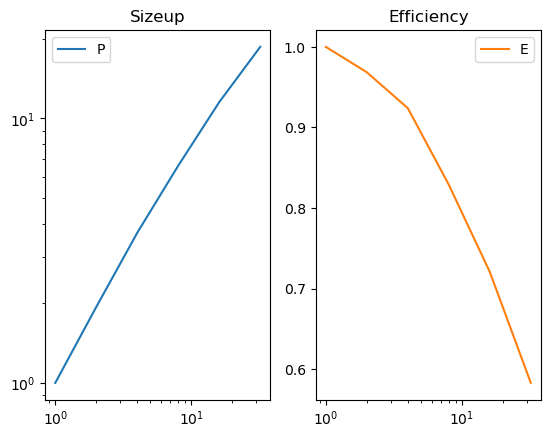

In [92]:
#Plot the parallel efficiency using the total computational time.
TW_Comp = PairW + NeighW
PW_Comp = np.zeros((TW_Comp.shape))
EW_Comp = np.zeros((TW_Comp.shape))

#Calculate the sizeup and the efficiency. 
for ii in range(len(LW)):
    PW_Comp[ii] = proc[ii] * TW_Comp[0] / TW_Comp[ii]
    EW_Comp[ii] = TW_Comp[0] / TW_Comp[ii]
    
#Plot the parallel efficiency using the loop time.
#Plot sizeup
fig, axs = plt.subplots(1,2)
axs[0].loglog(proc,PW_Comp, label="P")
axs[0].set_title("Sizeup")
axs[0].legend()

#Plotting the efficiency
axs[1].semilogx(proc,EW_Comp, "tab:orange", label="E")
axs[1].set_title("Efficiency")
axs[1].legend()

The overall shape of the curves here seem to be identical to that of the weak scaling efficiency for the total loop time. The one noticable difference is that the curves for the total computational time seem smoother, where smoothness referes to the jaggedness of the line. Another difference is that this is unlike the results we saw in the hard scaling. In the hard scaling, the total compuational time actually began to increase for the 32 processors but here it follows the pattern and continues to decrease.


### Communcation Time

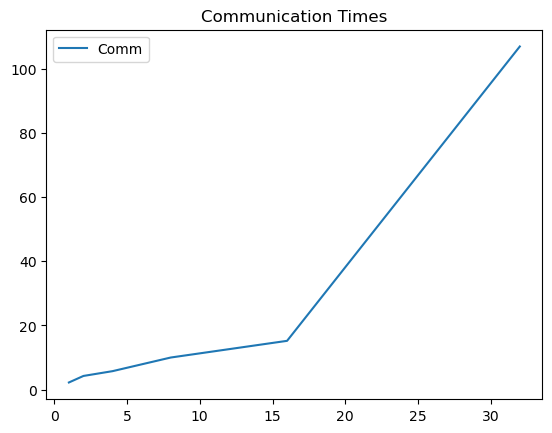

In [93]:
#Plot the communication time 
fig, axs = plt.subplots()
axs.plot(proc,CW, label="Comm")
axs.set_title("Communication Times")
axs.legend()

### Weak Scaling Efficiency with Dump Protocol

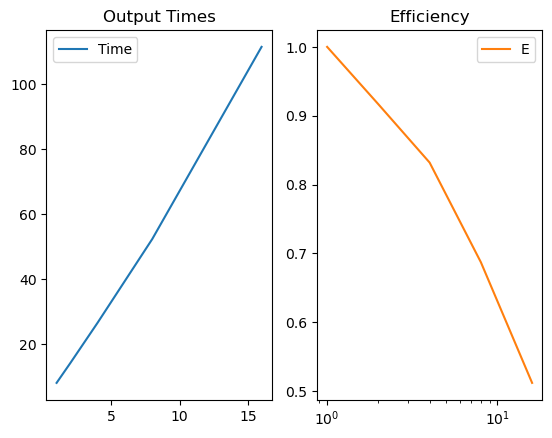

In [94]:
LoopWD =   np.array([272.917, 297.736, 328.041, 397.122, 533.095])
OutputWD = np.array([7.94322, 14.0261, 26.4834, 52.2858, 111.541])

PWD = np.zeros((LoopWD.shape))
EWD = np.zeros((LoopWD.shape))

#Calculate the sizeup and the efficiency. 
for ii in range(len(LoopWD)):
    PWD[ii] = proc[ii] * LoopWD[0] / LoopWD[ii]
    EWD[ii] = LoopWD[0] / LoopWD[ii]
    
#Plot the parallel efficiency using the loop time.
#Plot output times
fig, axs = plt.subplots(1,2)
axs[0].plot(proc[0:5],OutputWD, label="Time")
axs[0].set_title("Output Times")
axs[0].legend()

#Plotting the efficiency
axs[1].semilogx(proc[0:5],EWD, "tab:orange", label="E")
axs[1].set_title("Efficiency")
axs[1].legend()

The output times are doubling in size every time we double the number of processors. This suggests that we have a linear relationship between processors and output times. The implications that this holds for efficiency is that as we grow our computing system, we will grow increasingly inefficient as the output times are going to increase rapidly.

### Surface Area Expression

If we assume that the total computational domain has a side length of L, then we can divide the lengths of each side in the x, y, and z direction according to the number of processors that exist in each direction ($P_x$, $P_y$, $P_z$). 

If the sides of the total computation are not equal ($L_x \neq L_y$) then we define each respective side length by its axis $L_{x,y,z}$. 

Therefore, we might be able to calculate the surface area of the computational surface area of each individual processor with the following equation.

$$
s = 2\frac{L_x}{P_x}\frac{L_y}{P_y}
+2\frac{L_x}{P_x}\frac{L_z}{P_z}
+2\frac{L_y}{P_y}\frac{L_z}{P_z}
$$

Yes, this model does explain the data. As the number of processors grows, the surface area will form a larger and larger part of the calculation process. This is shown through the plotted diagram of the surface area of the same data set. 

Please note, however, that there is a degree of randomness that exists in the data set. The communication times seem to vary widely from run to run, so while this model might approximate it well in some cases - it might not in others. This warning exists specifically for the LAMMPS code. 

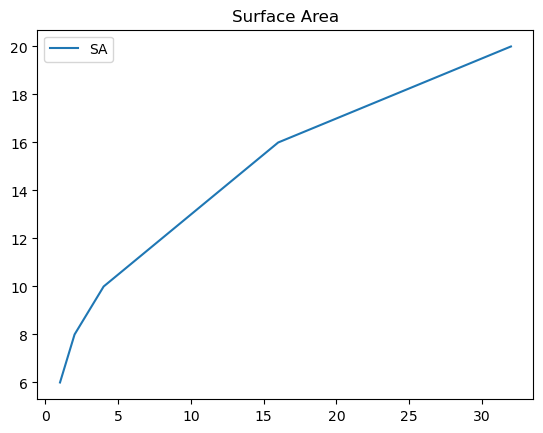

In [95]:
#arbitrary L value
l_x = 1 
l_y = 1 
l_z = 1

#Processor grids from logs
grid = [[1,1,1],
       [1,1,2],
       [1,2,2],
       [2,2,2],
       [2,2,4],
       [2,4,4]]

#filler
sa_plot = []

for jj in range(len(grid)):
    #get the grid coordinates
    prc = grid[jj]
    
    #calculate surface area
    sa = 2 * l_x/prc[0] * l_y/prc[1] + 2 * l_x/prc[0] * l_z/prc[2] + 2 * l_y/prc[1] * l_z/prc[2]
    
    #scale to number of procs
    ##append surface area value
    sa_plot.append(sa * proc[jj])

#Plot the parallel efficiency using the loop time.
#Plot output times
fig, axs = plt.subplots()
axs.plot(proc,sa_plot, label="SA")
axs.set_title("Surface Area")
axs.legend()


# Q2

### Monte Carlo Timing on 4 Processors

In [96]:
col_names = ["Points", "Area"]
area = [0.7000000000, 
        0.6650000000, 
        0.6867500000, 
        0.6988250000, 
        0.6982350000, 
        0.6978402500, 
        0.6976592500, 
        0.6977274575, 
        0.6977092915]

points = [10, 
          100, 
          1000, 
          10000, 
          100000, 
          1000000, 
          10000000, 
          100000000, 
          1000000000]
data = []
for j in range(len(area)):
    data.append([points[j], area[j]])
    
print(tabulate(data, headers=col_names))

    Points      Area
----------  --------
        10  0.7
       100  0.665
      1000  0.68675
     10000  0.698825
    100000  0.698235
   1000000  0.69784
  10000000  0.697659
 100000000  0.697727
1000000000  0.697709


### Strong Scaling Analysis
Plotting the speedup and the efficiency for strong scaling. 

$$
S(P) = \frac{T(1)}{T(P)} = P \\
E_P(P) = \frac{S(P)}{P} 
$$

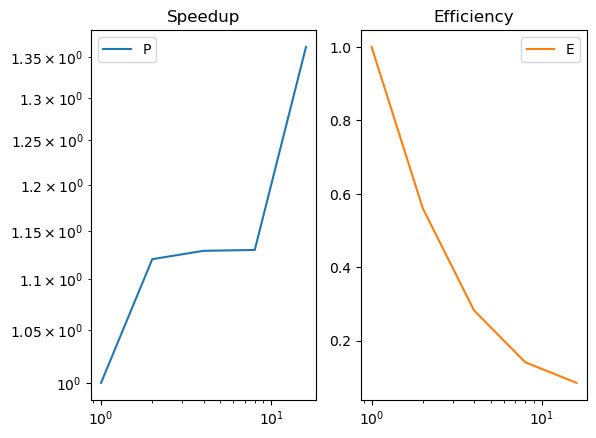

In [97]:
# The time values here are the "real" time outputs from the time comamnd.
MC_Time = np.array([7.035, 6.278, 6.230, 6.225, 5.164])

MCP = np.zeros((MC_Time.shape))
MCE = np.zeros((MC_Time.shape))

#Calculate our P and E (speedup)
for i in range(len(MC_Time)):
    MCP[i] = MC_Time[0]/ MC_Time[i]
    MCE[i] = MC_Time[0]/ (proc[i] * MC_Time[i])
    

#Plot the parallel efficiency using the real time.
#Plot speedup
fig, axs = plt.subplots(1,2)
axs[0].loglog(proc[0:5],MCP, label="P")
axs[0].set_title("Speedup")
axs[0].legend()

#Plotting the efficiency
axs[1].semilogx(proc[0:5],MCE, "tab:orange", label="E")
axs[1].set_title("Efficiency")
axs[1].legend()

### Random Number Generation
To ensure that different numbers were created on each processor, the `srand()` command needed to be seeded with different numbers for each processor. Otherwise, if all processors were seeded with the same random number seed - they would generate the same random numbers! 

To circumvent this problem, I simply had each processor call the `srand()` function with its own unique processor ID. This ensures that all processors are seeded with a different random number generator and they won't generate the same points. 